In [16]:
import darts
import torch
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from darts.dataprocessing.transformers.scaler import Scaler
from darts.timeseries import TimeSeries
from darts.utils.statistics import check_seasonality
from darts.utils.statistics import plot_residuals_analysis
from darts.utils.statistics import extract_trend_and_seasonality
from darts.dataprocessing.transformers.missing_values_filler import MissingValuesFiller
from darts.models.forecasting.arima import ARIMA
from darts.models.forecasting.nhits import NHiTSModel
from darts.models.forecasting.nbeats import NBEATSModel
from darts.models.forecasting.lgbm import LightGBMModel
from darts.models.forecasting.tcn_model import TCNModel

In [29]:
dataset = pd.read_csv('./data/Electric_Production.csv')
dataset['YYYY'] = dataset['DATE'].dt.strftime('%y')
dataset

AttributeError: Can only use .dt accessor with datetimelike values

<AxesSubplot: xlabel='DATE'>

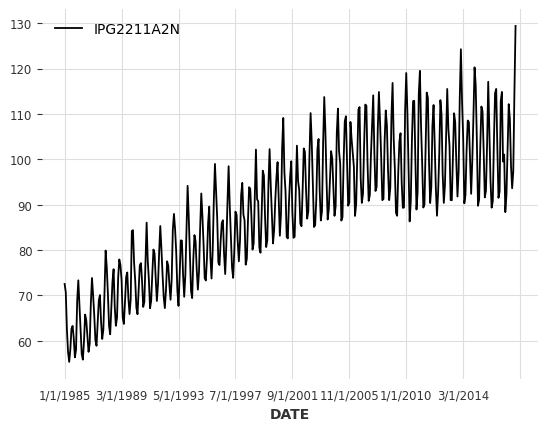

In [22]:
dataset.plot()